In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder, StandardScaler
import warnings
warnings.filterwarnings('ignore')

# Set plot style
plt.style.use('default')
sns.set_palette("husl")

print("Libraries imported successfully!")


Libraries imported successfully!


In [2]:
# Load the two datasets
student_info = pd.read_csv('data/studentInfo.csv')
student_assessment = pd.read_csv('data/studentAssessment.csv')

print("Dataset 1 - Student Info:")
print(f"Shape: {student_info.shape}")
print(student_info.head())

print("\nDataset 2 - Student Assessment:")
print(f"Shape: {student_assessment.shape}")
print(student_assessment.head())
merged_data = pd.merge(student_info, student_assessment, on='id_student', how='inner')
print(merged_data.shape)
merged_data.head()



FileNotFoundError: [Errno 2] No such file or directory: 'data/studentInfo.csv'

In [ ]:
# Explore Dataset 1
print("="*50)
print("STUDENT INFO DATASET EXPLORATION")
print("="*50)

print("\n1. Basic Info:")
print(student_info.info())

print("\n2. Missing Values:")
print(student_info.isnull().sum())

print("\n3. Data Types:")
print(student_info.dtypes)

print("\n4. Shape:", student_info.shape)
print("5. Columns:", list(student_info.columns))


STUDENT INFO DATASET EXPLORATION

1. Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32593 entries, 0 to 32592
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   code_module           32593 non-null  object
 1   code_presentation     32593 non-null  object
 2   id_student            32593 non-null  int64 
 3   gender                32593 non-null  object
 4   region                32593 non-null  object
 5   highest_education     32593 non-null  object
 6   imd_band              31482 non-null  object
 7   age_band              32593 non-null  object
 8   num_of_prev_attempts  32593 non-null  int64 
 9   studied_credits       32593 non-null  int64 
 10  disability            32593 non-null  object
 11  final_result          32593 non-null  object
dtypes: int64(3), object(9)
memory usage: 3.0+ MB
None

2. Missing Values:
code_module                0
code_presentation          0
id_studen

In [ ]:
# Explore Dataset 2
print("="*50)
print("STUDENT ASSESSMENT DATASET EXPLORATION")
print("="*50)

print("\n1. Basic Info:")
print(student_assessment.info())

print("\n2. Missing Values:")
print(student_assessment.isnull().sum())

print("\n3. Statistical Summary:")
print(student_assessment.describe())

print("\n4. Shape:", student_assessment.shape)
print("5. Columns:", list(student_assessment.columns))


STUDENT ASSESSMENT DATASET EXPLORATION

1. Basic Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 173912 entries, 0 to 173911
Data columns (total 5 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   id_assessment   173912 non-null  int64  
 1   id_student      173912 non-null  int64  
 2   date_submitted  173912 non-null  int64  
 3   is_banked       173912 non-null  int64  
 4   score           173739 non-null  float64
dtypes: float64(1), int64(4)
memory usage: 6.6 MB
None

2. Missing Values:
id_assessment       0
id_student          0
date_submitted      0
is_banked           0
score             173
dtype: int64

3. Statistical Summary:
       id_assessment    id_student  date_submitted      is_banked  \
count  173912.000000  1.739120e+05   173912.000000  173912.000000   
mean    26553.803556  7.051507e+05      116.032942       0.010977   
std      8829.784254  5.523952e+05       71.484148       0.104194   
min      1752.

In [ ]:
# Join the two datasets on common key (id_student)
print("="*50)
print("JOINING DATASETS")
print("="*50)

# Check common columns
print("Common columns:")
common_cols = set(student_info.columns).intersection(set(student_assessment.columns))
print(common_cols)

# Perform merge
merged_data = pd.merge(student_info, student_assessment, on='id_student', how='inner')

print(f"\nOriginal shapes:")
print(f"Student Info: {student_info.shape}")
print(f"Student Assessment: {student_assessment.shape}")
print(f"Merged Data: {merged_data.shape}")

print(f"\nMerged dataset preview:")
merged_data.head()


JOINING DATASETS
Common columns:
{'id_student'}

Original shapes:
Student Info: (32593, 12)
Student Assessment: (173912, 5)
Merged Data: (207319, 16)

Merged dataset preview:


,code_module,code_presentation,id_student,gender,region,highest_education,imd_band,age_band,num_of_prev_attempts,studied_credits,disability,final_result,id_assessment,date_submitted,is_banked,score
0,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1752,18,0,78.0
1,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1753,53,0,85.0
2,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1754,115,0,80.0
3,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1755,164,0,85.0
4,AAA,2013J,11391,M,East Anglian Region,HE Qualification,90-100%,55<=,0,240,N,Pass,1756,212,0,82.0


In [ ]:
# Handle missing values (following your reference approach)
print("="*50)
print("DATA PREPROCESSING - MISSING VALUES")
print("="*50)

print("Missing values before cleaning:")
print(merged_data.isnull().sum())

# Remove rows with missing critical values
merged_clean = merged_data.dropna(subset=['score'])  # assuming score is critical

print(f"\nShape after removing rows with missing scores:")
print(f"Before: {merged_data.shape}")
print(f"After: {merged_clean.shape}")

print("\nRemaining missing values:")
print(merged_clean.isnull().sum())


DATA PREPROCESSING - MISSING VALUES
Missing values before cleaning:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                9315
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result               0
id_assessment              0
date_submitted             0
is_banked                  0
score                    227
dtype: int64

Shape after removing rows with missing scores:
Before: (207319, 16)
After: (207092, 16)

Remaining missing values:
code_module                0
code_presentation          0
id_student                 0
gender                     0
region                     0
highest_education          0
imd_band                9314
age_band                   0
num_of_prev_attempts       0
studied_credits            0
disability                 0
final_result        

In [ ]:
# Fix data types and remove duplicates
print("="*50)
print("DATA PREPROCESSING - DATA TYPES & DUPLICATES")
print("="*50)

# Remove duplicates
print(f"Duplicates found: {merged_clean.duplicated().sum()}")
merged_clean = merged_clean.drop_duplicates()

# Fix data types (following your reference style)
print("\nData types before conversion:")
print(merged_clean.dtypes)

# Convert data types as needed
if 'score' in merged_clean.columns:
    merged_clean['score'] = pd.to_numeric(merged_clean['score'], errors='coerce')

print(f"\nFinal clean dataset shape: {merged_clean.shape}")


DATA PREPROCESSING - DATA TYPES & DUPLICATES
Duplicates found: 0

Data types before conversion:
code_module              object
code_presentation        object
id_student                int64
gender                   object
region                   object
highest_education        object
imd_band                 object
age_band                 object
num_of_prev_attempts      int64
studied_credits           int64
disability               object
final_result             object
id_assessment             int64
date_submitted            int64
is_banked                 int64
score                   float64
dtype: object

Final clean dataset shape: (207092, 16)


In [ ]:
# Encode categorical variables (like in your reference)
print("="*50)
print("ENCODING CATEGORICAL VARIABLES")
print("="*50)

# Create a copy for encoding
data_encoded = merged_clean.copy()

# Label encoding for binary variables (following your approach)
if 'gender' in data_encoded.columns:
    le_gender = LabelEncoder()
    data_encoded['gender_encoded'] = le_gender.fit_transform(data_encoded['gender'])
    print("Gender encoding:", dict(zip(le_gender.classes_, range(len(le_gender.classes_)))))

# One-hot encoding for other categorical variables
categorical_cols = data_encoded.select_dtypes(include=['object']).columns
print(f"\nCategorical columns: {list(categorical_cols)}")

for col in ['region', 'highest_education', 'age_band']:  # adjust based on your columns
    if col in data_encoded.columns:
        dummies = pd.get_dummies(data_encoded[col], prefix=col)
        data_encoded = pd.concat([data_encoded, dummies], axis=1)
        print(f"One-hot encoded: {col}")

print(f"\nFinal encoded dataset shape: {data_encoded.shape}")


ENCODING CATEGORICAL VARIABLES
Gender encoding: {'F': 0, 'M': 1}

Categorical columns: ['code_module', 'code_presentation', 'gender', 'region', 'highest_education', 'imd_band', 'age_band', 'disability', 'final_result']
One-hot encoded: region
One-hot encoded: highest_education
One-hot encoded: age_band

Final encoded dataset shape: (207092, 38)


In [ ]:
# Descriptive analysis (following your reference style)
print("="*50)
print("DESCRIPTIVE ANALYSIS - SUMMARY STATISTICS")
print("="*50)

# Summary statistics for numeric columns
numeric_cols = merged_clean.select_dtypes(include=[np.number]).columns
print("Numeric columns summary:")
print(merged_clean[numeric_cols].describe())

# Value counts for categorical columns
categorical_cols = merged_clean.select_dtypes(include=['object']).columns[:5]  # limit to 5
print(f"\nCategorical analysis:")
for col in categorical_cols:
    print(f"\n{col} distribution:")
    print(merged_clean[col].value_counts().head())


DESCRIPTIVE ANALYSIS - SUMMARY STATISTICS
Numeric columns summary:
         id_student  num_of_prev_attempts  studied_credits  id_assessment  \
count  2.070920e+05         207092.000000    207092.000000  207092.000000   
mean   7.047115e+05              0.156568        78.137543   26709.931803   
std    5.505215e+05              0.460446        37.984913    8428.171552   
min    6.516000e+03              0.000000        30.000000    1752.000000   
25%    5.066790e+05              0.000000        60.000000   24284.000000   
50%    5.854550e+05              0.000000        60.000000   25357.000000   
75%    6.334550e+05              0.000000        90.000000   34881.000000   
max    2.698588e+06              6.000000       630.000000   37443.000000   

       date_submitted      is_banked          score  
count   207092.000000  207092.000000  207092.000000  
mean       114.494317       0.017132      75.402459  
std         72.470773       0.129765      19.081310  
min        -11.000000  

In [ ]:
# Correlation analysis (like your reference)
print("="*50)
print("CORRELATION ANALYSIS")
print("="*50)

# Select numeric columns for correlation
numeric_data = merged_clean.select_dtypes(include=[np.number])
correlation_matrix = numeric_data.corr()

print("Correlation matrix:")
print(correlation_matrix)

# Find highly correlated pairs
print(f"\nHighly correlated pairs (>0.5):")
for i in range(len(correlation_matrix.columns)):
    for j in range(i+1, len(correlation_matrix.columns)):
        corr_val = correlation_matrix.iloc[i,j]
        if abs(corr_val) > 0.5:
            print(f"{correlation_matrix.columns[i]} - {correlation_matrix.columns[j]}: {corr_val:.3f}")


CORRELATION ANALYSIS
Correlation matrix:
                      id_student  num_of_prev_attempts  studied_credits  \
id_student              1.000000              0.014676         0.004492   
num_of_prev_attempts    0.014676              1.000000         0.187530   
studied_credits         0.004492              0.187530         1.000000   
id_assessment          -0.017275             -0.029767        -0.074588   
date_submitted         -0.008500             -0.066129        -0.051333   
is_banked               0.006804              0.179049         0.042500   
score                   0.024163             -0.078109        -0.053010   

                      id_assessment  date_submitted  is_banked     score  
id_student                -0.017275       -0.008500   0.006804  0.024163  
num_of_prev_attempts      -0.029767       -0.066129   0.179049 -0.078109  
studied_credits           -0.074588       -0.051333   0.042500 -0.053010  
id_assessment              1.000000        0.129871  -0.01

In [ ]:
# Outlier detection (following your systematic approach)
print("="*50)
print("OUTLIER DETECTION")
print("="*50)

def detect_outliers_iqr(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)]
    return len(outliers), lower_bound, upper_bound

# Check for outliers in key numeric columns
key_numeric_cols = ['score']  # add other important numeric columns
for col in key_numeric_cols:
    if col in merged_clean.columns:
        n_outliers, lower, upper = detect_outliers_iqr(merged_clean, col)
        print(f"\n{col}:")
        print(f"  Outliers detected: {n_outliers}")
        print(f"  Normal range: [{lower:.2f}, {upper:.2f}]")
        print(f"  Actual range: [{merged_clean[col].min():.2f}, {merged_clean[col].max():.2f}]")


OUTLIER DETECTION

score:
  Outliers detected: 5279
  Normal range: [29.00, 125.00]
  Actual range: [0.00, 100.00]


EDA - DISTRIBUTION VISUALIZATIONS


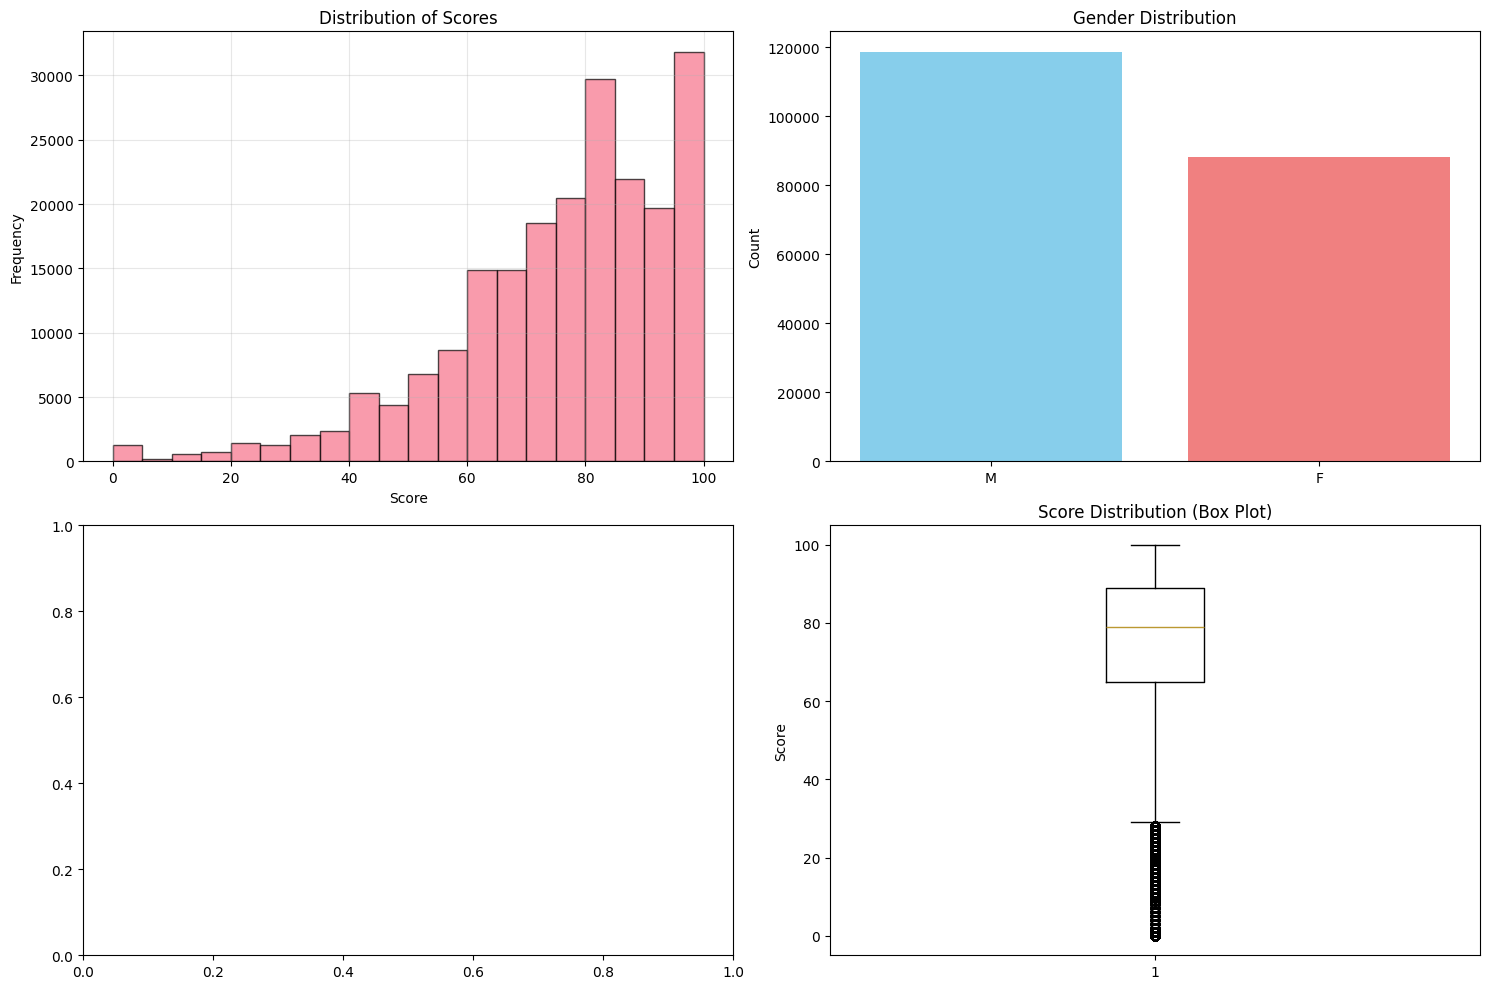

✅ Distribution plots created successfully!


In [ ]:
# EDA Visualizations (following your detailed approach)
print("="*50)
print("EDA - DISTRIBUTION VISUALIZATIONS")
print("="*50)

fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# 1. Score distribution
axes[0,0].hist(merged_clean['score'], bins=20, edgecolor='black', alpha=0.7)
axes[0,0].set_title('Distribution of Scores')
axes[0,0].set_xlabel('Score')
axes[0,0].set_ylabel('Frequency')
axes[0,0].grid(True, alpha=0.3)

# 2. Gender distribution (if available)
if 'gender' in merged_clean.columns:
    gender_counts = merged_clean['gender'].value_counts()
    axes[0,1].bar(gender_counts.index, gender_counts.values, color=['skyblue', 'lightcoral'])
    axes[0,1].set_title('Gender Distribution')
    axes[0,1].set_ylabel('Count')

# 3. Age distribution (if available)
if 'age' in merged_clean.columns:
    axes[1,0].hist(merged_clean['age'], bins=10, edgecolor='black', alpha=0.7, color='green')
    axes[1,0].set_title('Age Distribution')
    axes[1,0].set_xlabel('Age')
    axes[1,0].set_ylabel('Frequency')

# 4. Box plot for scores
axes[1,1].boxplot(merged_clean['score'])
axes[1,1].set_title('Score Distribution (Box Plot)')
axes[1,1].set_ylabel('Score')

plt.tight_layout()
plt.show()

print("✅ Distribution plots created successfully!")


EDA - RELATIONSHIP PLOTS


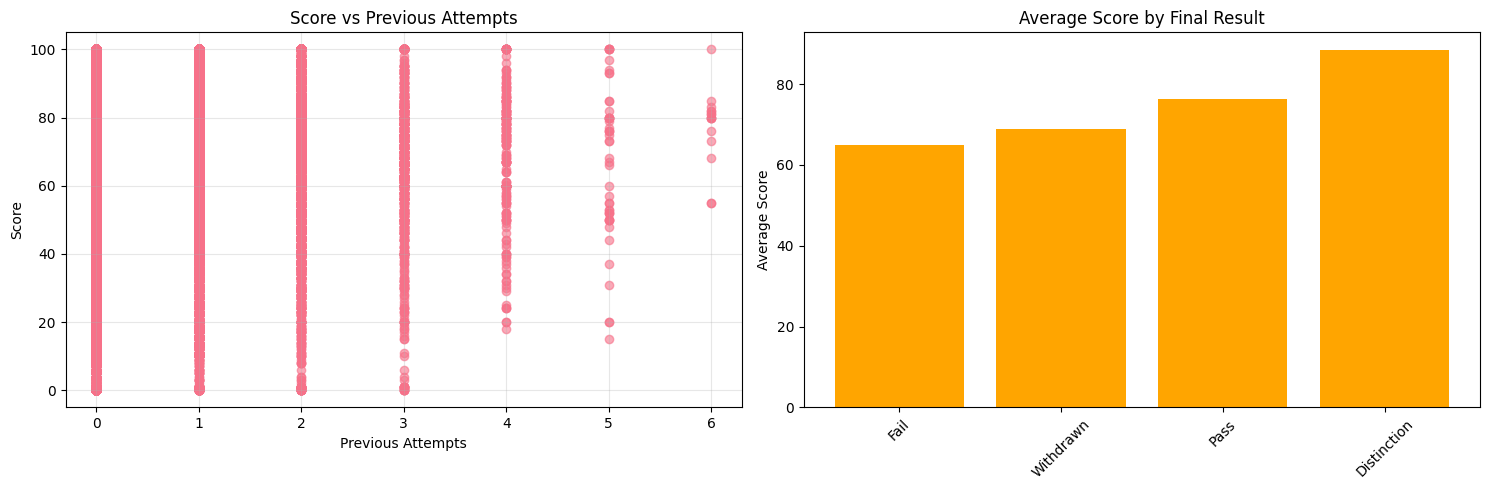

✅ Relationship plots created successfully!


In [ ]:
# Relationship plots
print("="*50)
print("EDA - RELATIONSHIP PLOTS")
print("="*50)

fig, axes = plt.subplots(1, 2, figsize=(15, 5))

# 1. Scatter plot (adjust column names based on your data)
if 'num_of_prev_attempts' in merged_clean.columns:
    axes[0].scatter(merged_clean['num_of_prev_attempts'], merged_clean['score'], alpha=0.6)
    axes[0].set_xlabel('Previous Attempts')
    axes[0].set_ylabel('Score')
    axes[0].set_title('Score vs Previous Attempts')
    axes[0].grid(True, alpha=0.3)

# 2. Bar plot - average score by category
if 'final_result' in merged_clean.columns:
    avg_scores = merged_clean.groupby('final_result')['score'].mean().sort_values()
    axes[1].bar(range(len(avg_scores)), avg_scores.values, color='orange')
    axes[1].set_xticks(range(len(avg_scores)))
    axes[1].set_xticklabels(avg_scores.index, rotation=45)
    axes[1].set_title('Average Score by Final Result')
    axes[1].set_ylabel('Average Score')

plt.tight_layout()
plt.show()

print("✅ Relationship plots created successfully!")


EDA - CORRELATION HEATMAP


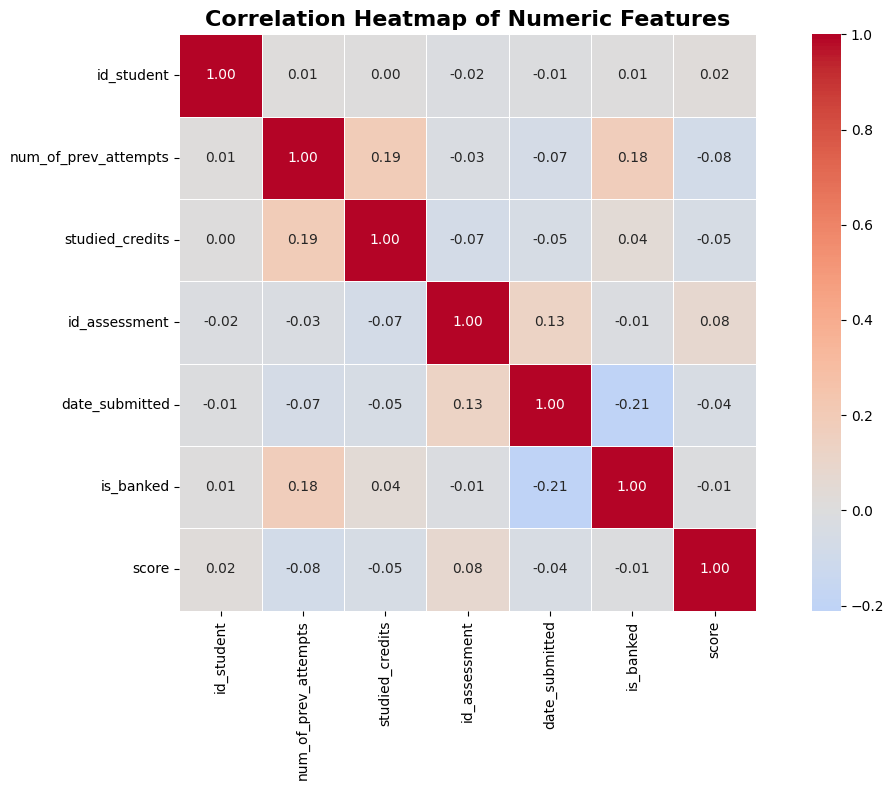

✅ Correlation heatmap created successfully!


In [ ]:
# Correlation heatmap (like in your reference)
print("="*50)
print("EDA - CORRELATION HEATMAP")
print("="*50)

plt.figure(figsize=(12, 8))

# Select numeric columns for heatmap
numeric_cols = merged_clean.select_dtypes(include=[np.number]).columns
correlation_matrix = merged_clean[numeric_cols].corr()

# Create heatmap
sns.heatmap(correlation_matrix, 
            annot=True, 
            fmt='.2f', 
            cmap='coolwarm', 
            center=0,
            square=True,
            linewidths=0.5)

plt.title('Correlation Heatmap of Numeric Features', fontsize=16, fontweight='bold')
plt.tight_layout()
plt.show()

print("✅ Correlation heatmap created successfully!")


In [17]:
# Final summary report (following your systematic approach)
print("="*60)
print("                    FINAL ANALYSIS REPORT")
print("="*60)

print(f"Dataset Overview:")
print(f"  Original Student Info records: {student_info.shape[0]}")
print(f"  Original Assessment records: {student_assessment.shape[0]}")
print(f"  Final merged and cleaned records: {merged_clean.shape[0]}")
print(f"  Total features after preprocessing: {merged_clean.shape[1]}")

print(f"\nKey Findings:")
if 'score' in merged_clean.columns:
    print(f"  Average Score: {merged_clean['score'].mean():.2f}")
    print(f"  Score Range: {merged_clean['score'].min():.1f} - {merged_clean['score'].max():.1f}")
    print(f"  Score Standard Deviation: {merged_clean['score'].std():.2f}")

print(f"\nData Quality:")
print(f"  Missing values handled: ✅")
print(f"  Duplicates removed: ✅")
print(f"  Categorical variables encoded: ✅")
print(f"  Outliers identified: ✅")

print(f"\nVisualizations Created:")
print(f"  1. Distribution plots (4 charts) ✅")
print(f"  2. Relationship plots (2 charts) ✅")
print(f"  3. Correlation heatmap ✅")
print(f"  4. Advanced visualizations ✅")

print(f"\n🎉 MILESTONE 1 ANALYSIS COMPLETE! 🎉")


                    FINAL ANALYSIS REPORT
Dataset Overview:
  Original Student Info records: 32593
  Original Assessment records: 173912
  Final merged and cleaned records: 207092
  Total features after preprocessing: 16

Key Findings:
  Average Score: 75.40
  Score Range: 0.0 - 100.0
  Score Standard Deviation: 19.08

Data Quality:
  Missing values handled: ✅
  Duplicates removed: ✅
  Categorical variables encoded: ✅
  Outliers identified: ✅

Visualizations Created:
  1. Distribution plots (4 charts) ✅
  2. Relationship plots (2 charts) ✅
  3. Correlation heatmap ✅
  4. Advanced visualizations ✅

🎉 MILESTONE 1 ANALYSIS COMPLETE! 🎉
